<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ввод-и-преобработка-данных" data-toc-modified-id="Ввод-и-преобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ввод и преобработка данных</a></span></li><li><span><a href="#Метод-k-means" data-toc-modified-id="Метод-k-means-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Метод k-means</a></span></li><li><span><a href="#Оценка-качества-кластеризации-на-примере-k-means" data-toc-modified-id="Оценка-качества-кластеризации-на-примере-k-means-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Оценка качества кластеризации на примере k-means</a></span></li><li><span><a href="#Агломеративная-иерархическая-кластеризация" data-toc-modified-id="Агломеративная-иерархическая-кластеризация-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Агломеративная иерархическая кластеризация</a></span></li><li><span><a href="#Метод-DBSCAN" data-toc-modified-id="Метод-DBSCAN-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Метод DBSCAN</a></span></li></ul></div>

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<h3>Ввод и преобработка данных</h3>

In [4]:
df_train_raw = pd.read_csv('data\Mall_Customers.csv', sep=',')
df_train_raw.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df_train_raw.rename(index=str, columns={'Annual Income (k$)': 'Income', 
                                        'Spending Score (1-100)': 'Score'}, 
                                        inplace=True)

df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [6]:
df_train_raw.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df_train_raw.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [8]:
## Если захочется перевести от интерпретируемых оценок к единичному отрезку

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# df_train_raw[['Age' , 'Income' , 'Score']] = scaler.fit_transform(df_train_raw[['Age' , 'Income' , 'Score']])

In [9]:
df_train_raw.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# ID здесь нам не потребуется, не несет никакой информации
df_train_raw.drop(['CustomerID'],  axis=1, inplace=True)

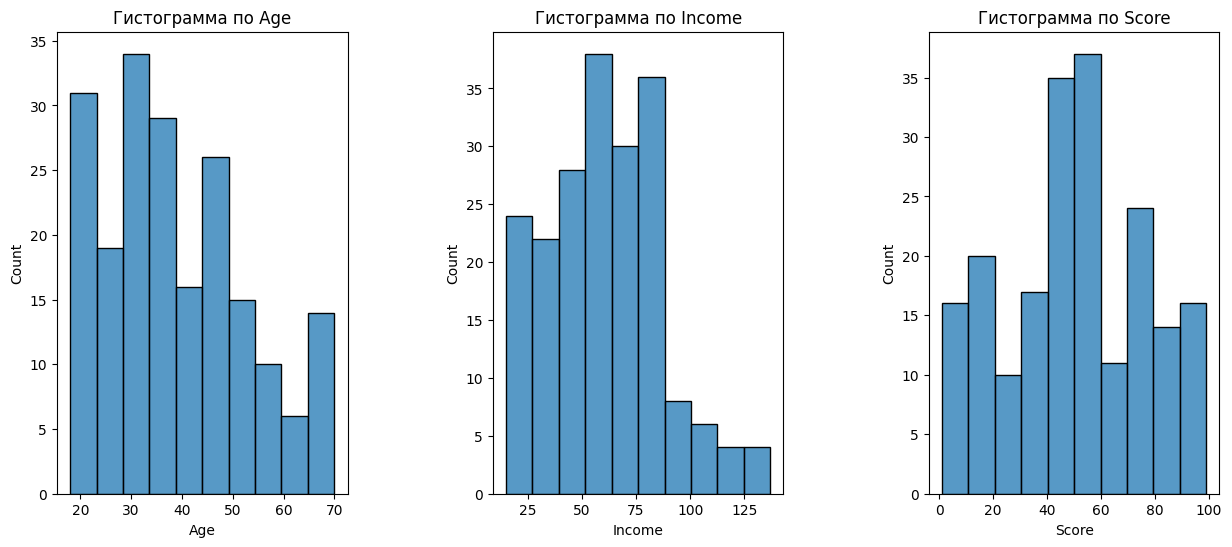

In [11]:
# распределение плотности данных

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Income' , 'Score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(df_train_raw[x] , bins = 10)
    plt.title('Гистограмма по {}'.format(x))
plt.show()

C:\Users\TICS lab\AppData\Local\Temp\ipykernel_6924\1835466854.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train_raw.corr(), annot=True)


<AxesSubplot: >

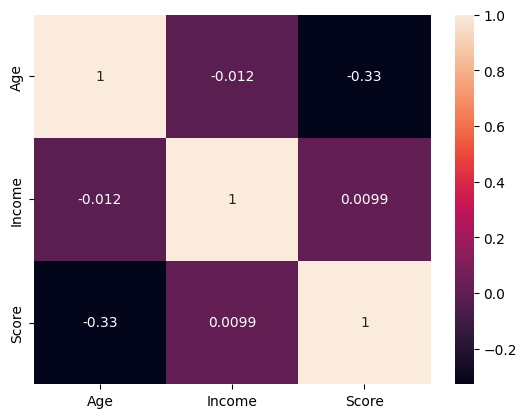

In [12]:
# корреляции по Пирсону

sns.heatmap(df_train_raw.corr(), annot=True)

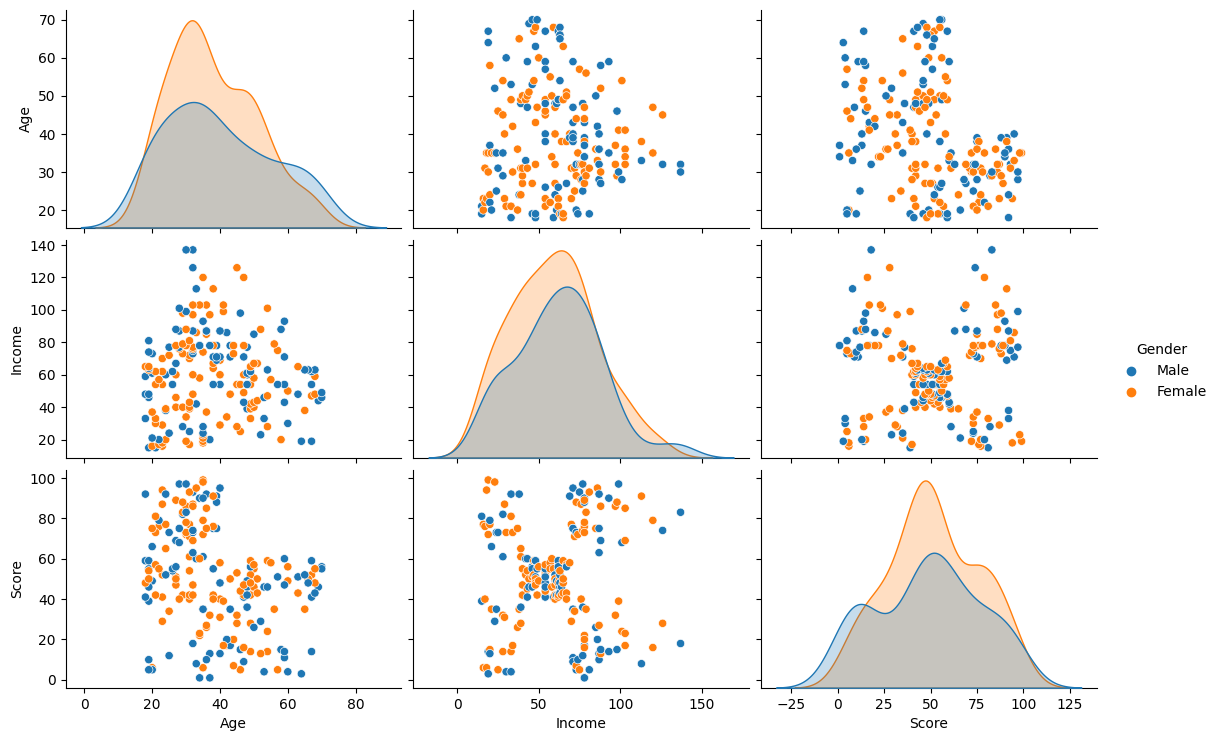

In [13]:
# Покомпонентные плотностные распределения объектов относительно категориальной переменной Gender

X = df_train_raw
g = sns.pairplot(X, hue='Gender', aspect=1.5)
plt.show()

In [14]:
X = df_train_raw.copy()

## Из исхдного набора данных убираем номинативные характеристику, т.к. она нам ни на что не влияет
X.drop(['Gender'],  axis=1, inplace=True)

<h3>Метод k-means</h3>

d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\FVB\ProgramFiles\Python3108\l

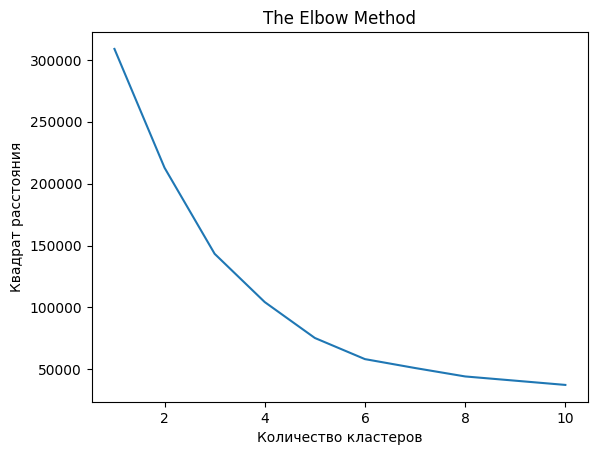

In [15]:
from sklearn.cluster import KMeans

# # Подбираем оптимальное количество кластеров, при помощи метода "ребра"
# Сумма квадратов расстояний от выборок до центра их ближайшего кластера
clust_range = []

num_clust = 11

# Поиск таких расстояний для разного количества кластеров
for i in range(1, num_clust):
    kmeans = KMeans(n_clusters= i, max_iter=300, 
                    random_state=42).fit(X)

    clust_range.append(kmeans.inertia_)

plt.plot(range(1, num_clust), clust_range)
plt.title('The Elbow Method')
plt.xlabel('Количество кластеров')
plt.ylabel('Квадрат расстояния')
plt.show()

d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


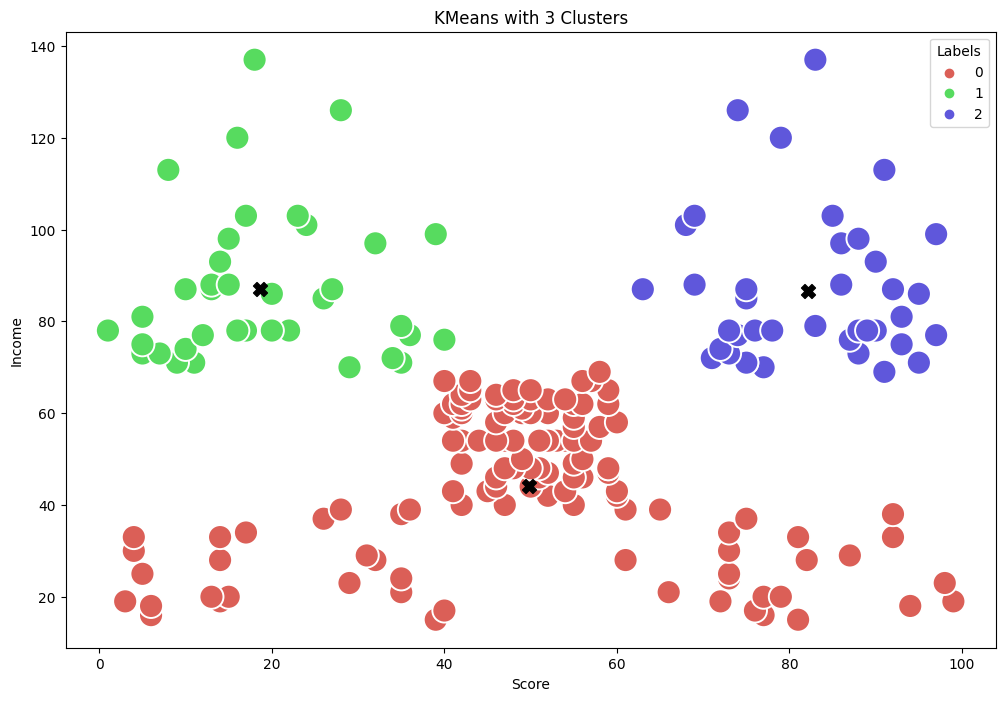

d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


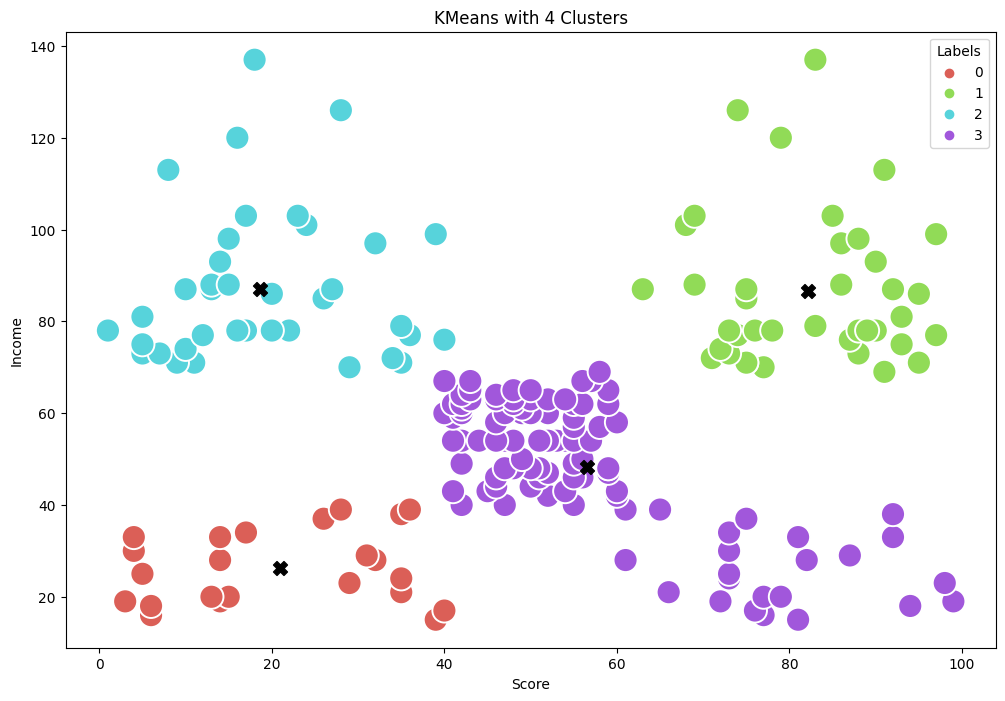

d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


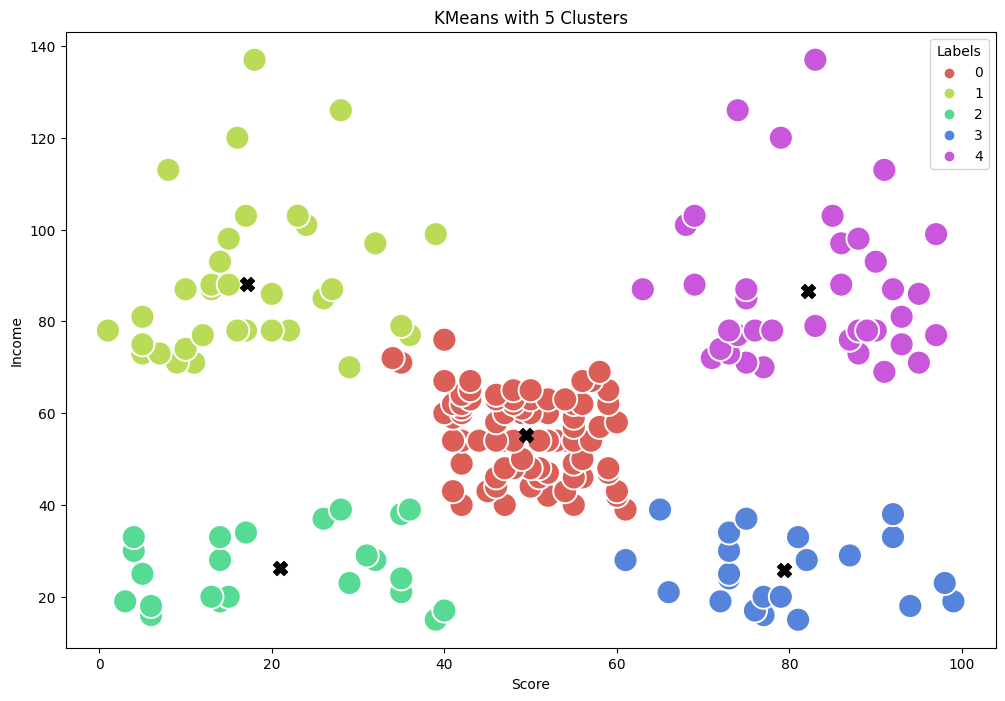

d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


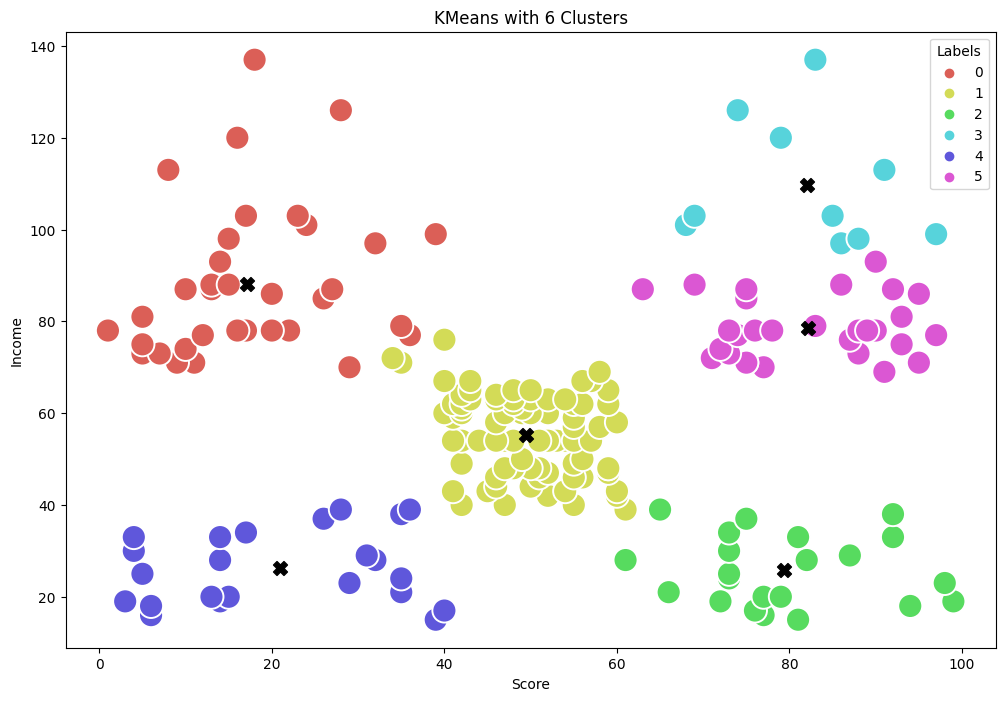

In [16]:
# # Видно, что основные изломы на отрезке от 3 до 6 и будем их рассматривать, скорей всего либо 3, либо 5
# Построим кластеризацию и визуально оценим разбиение в срезе Score и Income

for i in range(3,7):

    kmeans = KMeans(n_clusters=i, max_iter=300,
                    random_state=42).fit(X[["Score", "Income"]])
    X['Labels'] = kmeans.labels_

    plt.figure(figsize=(12, 8))

    # Разметка распределения
    sns.scatterplot(data=X, x="Score", y="Income", hue=X["Labels"], 
                    palette=sns.color_palette('hls', i), s = 300,)
    
    # Раставляем центры
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s = 100, c = 'black', marker="X")

    plt.title(f'KMeans with {i} Clusters')
    plt.show()

d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


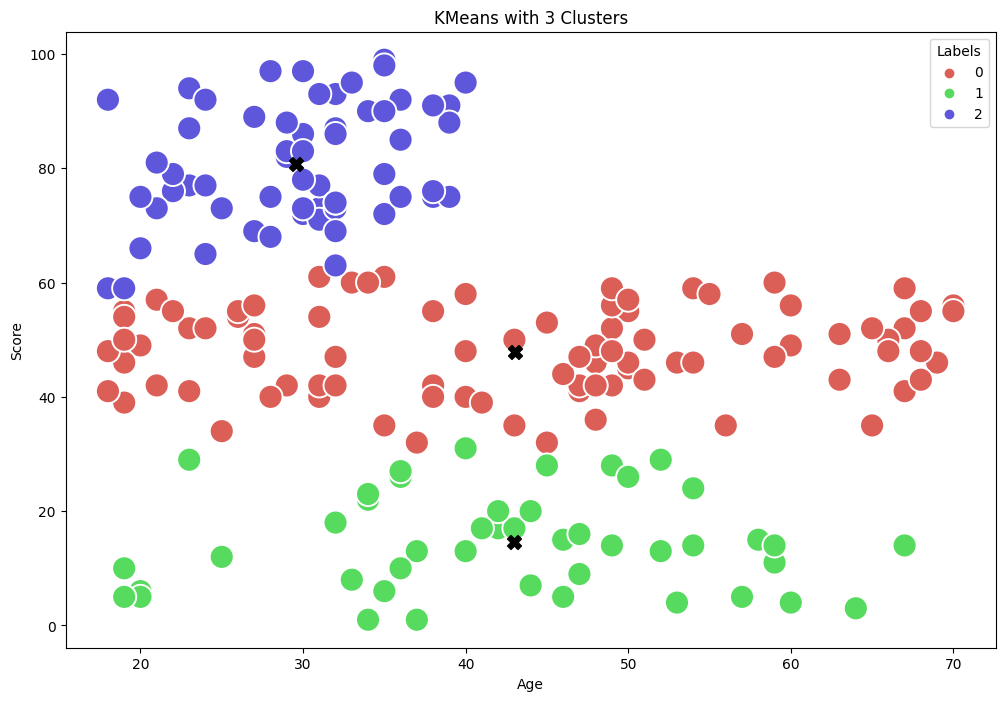

d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


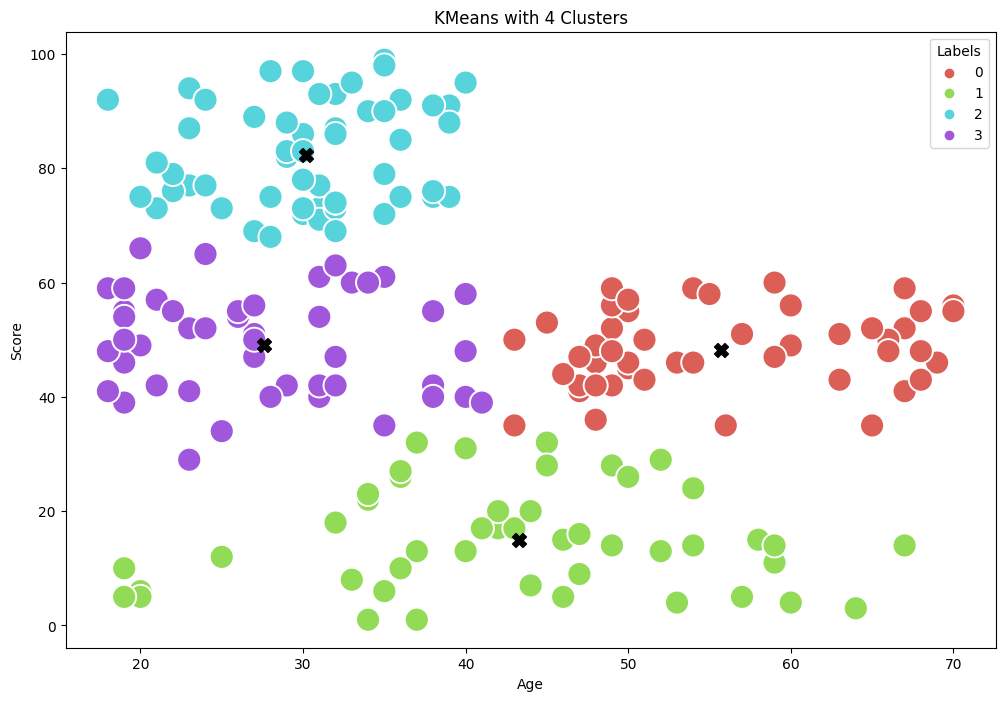

d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


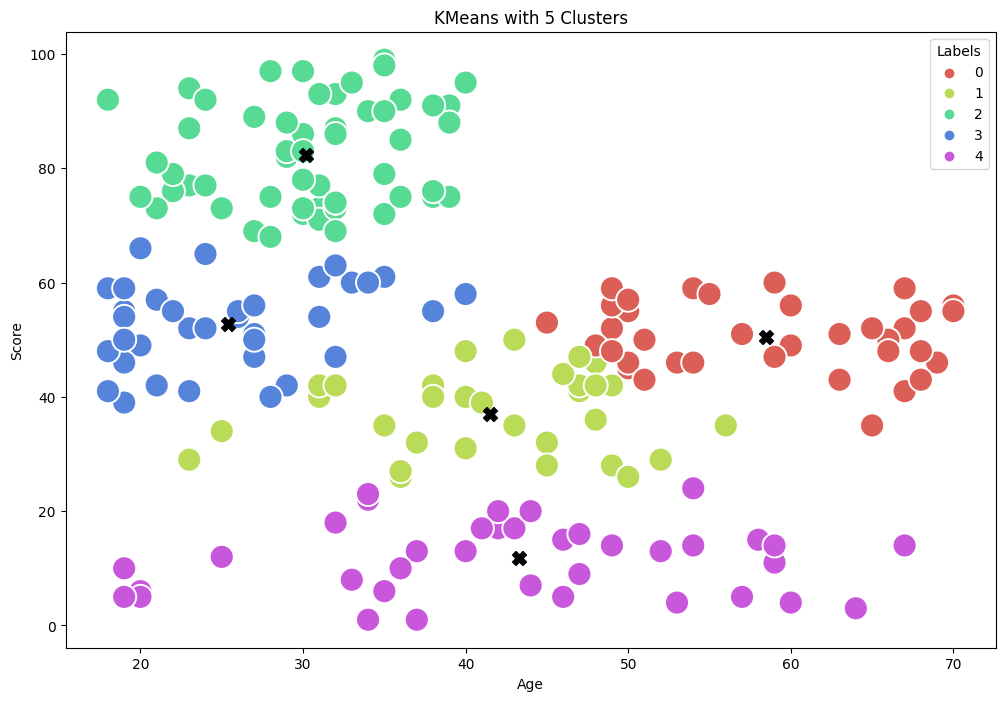

d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


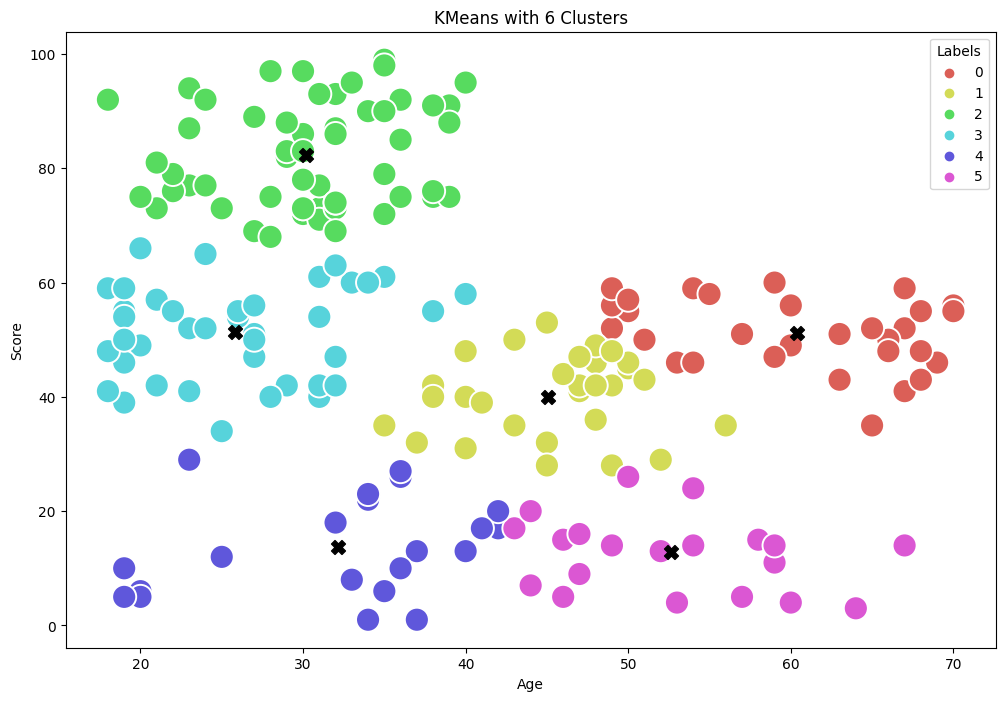

In [17]:
# Построим кластеризацию и визуально оценим разбиение в срезе Age и Score

for i in range(3,7):

    kmeans = KMeans(n_clusters=i, max_iter=300,
                    random_state=42).fit(X[["Age", "Score"]])
    X['Labels'] = kmeans.labels_

    plt.figure(figsize=(12, 8))

    # Разметка распределения
    sns.scatterplot(data=X, x="Age", y="Score", hue=X["Labels"], 
                    palette=sns.color_palette('hls', i), s = 300)
    
    # Раставляем центры
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s = 100, c = 'black', marker="X")

    plt.title(f'KMeans with {i} Clusters')
    plt.show()

In [18]:
# # 5 кластеров кажется оптимальным количеством
# Теперь построим 3-хмерную визуализацию кластеризации по всем 3м компонентам
kmeans = KMeans(
                n_clusters = 5, 
                max_iter=300, 
                random_state= 42
            )        

kmeans = kmeans.fit(X[["Age", "Score", "Income"]])

X['cluster'] = kmeans.labels_

d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\TICS lab\AppData\Local\Temp\ipykernel_6924\942403245.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Labels', y='Income', data=X, ax=ax,
C:\Users\TICS lab\AppData\Local\Temp\ipykernel_6924\942403245.py:5: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(x='Labels', y='Income', data=X, ax=ax,
C:\Users\TICS lab\AppData\Local\Temp\ipykernel_6924\942403245.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Labels', y='Score', data=X, ax=ax,
C:\Users\TICS lab\AppData\Local\Temp\ipykernel_6924\942403245.py:10: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(x='Labels', y='Score', data=X, ax=ax,
C:\Users\TICS lab\AppData\Local\Temp\ipykernel_6924\942403245.py:15: FutureWarning: Passing `palette` without 

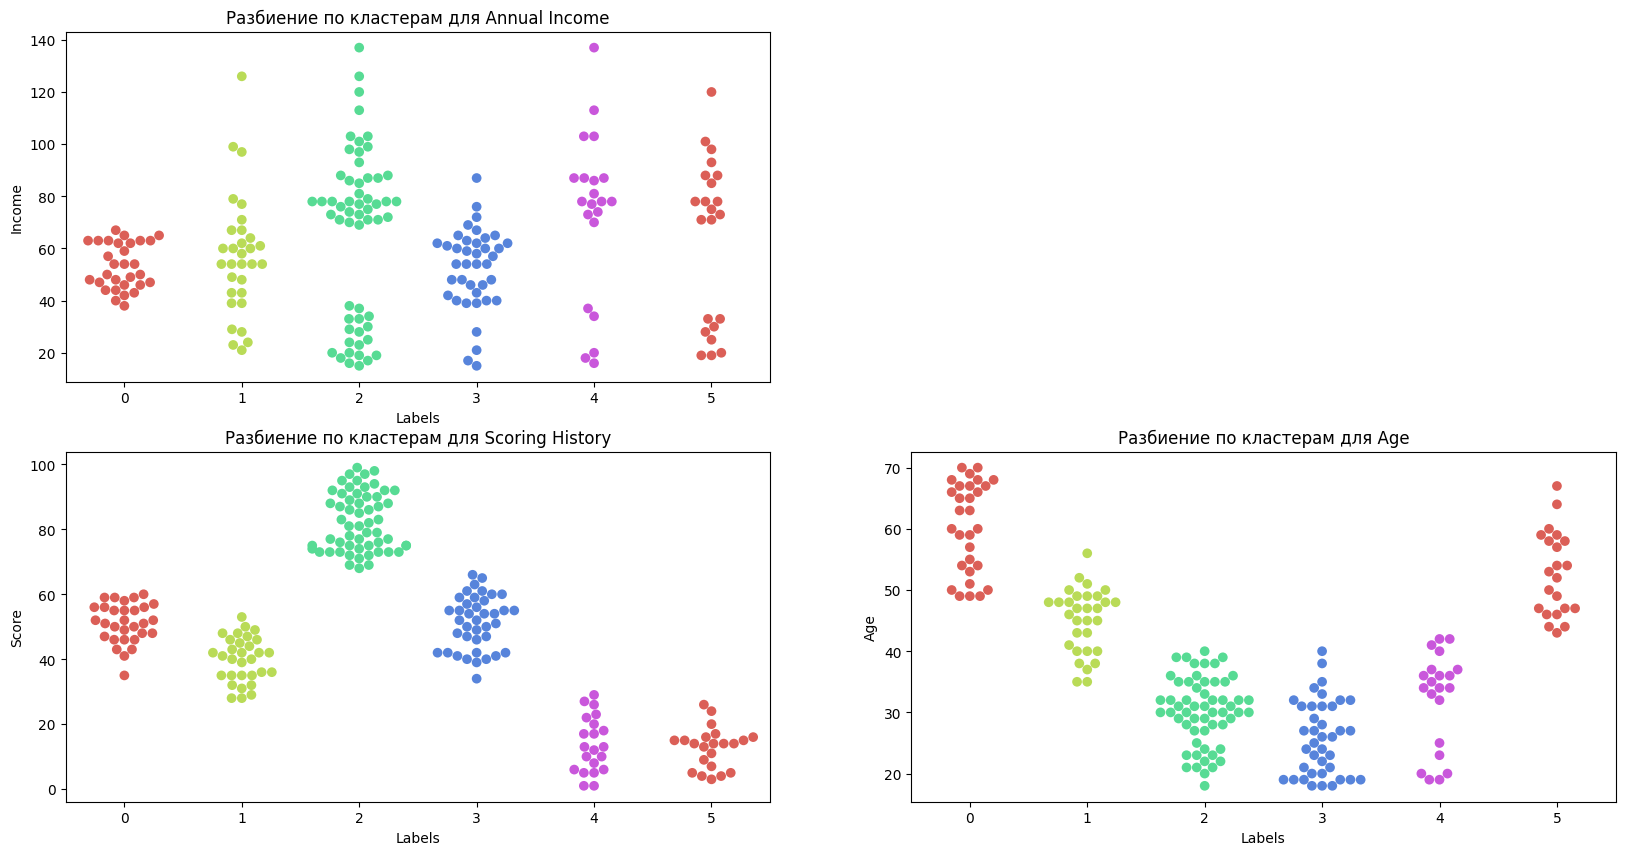

In [19]:
# Смотрим распределение объектов по кластерам

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(221)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax, 
                palette=sns.color_palette('hls', 5), s = 7)
ax.set_title('Разбиение по кластерам для Annual Income')

ax = fig.add_subplot(223)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax, 
                palette=sns.color_palette('hls', 5), s = 7)
ax.set_title('Разбиение по кластерам для Scoring History')

ax = fig.add_subplot(224)
sns.swarmplot(x='Labels', y='Age', data=X, ax=ax, 
                palette=sns.color_palette('hls', 5), s = 7)
ax.set_title('Разбиение по кластерам для Age')

plt.show()

In [20]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= X['Age'],
    y= X['Score'],
    z= X['Income'],

    mode='markers',
     marker=dict(
        color = X['cluster'], 
        size= 10,
        line=dict(color= X['cluster'], width= 10), opacity=0.75)
)

data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Score'),
            zaxis = dict(title  = 'Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

<h3>Оценка качества кластеризации на примере k-means</h3>

In [21]:
from random import randrange

# предположим, что у нас существуют метки
# для данного набора даннах используем случайный набор
X['true'] = [randrange(5) for i in range(len(X['cluster']))]

In [22]:
from sklearn.metrics import f1_score

baseline = X["true"].value_counts()

# Считаем абсолютные совпадения
AC = len(X[X['true'] == X['cluster']]) / len(X)
print('Общая доля совпадений: %7.5f,' %(AC))
print('-'*30)

# Считаем совпадения по каждому кластеру
for i in range(5):
    AC = len(X[(X['true'] == i) \
                & (X['cluster']== i)]) \
                / len(X[X['true'] == i]
            )
    print(f'Доля совпадений для кластера {i+1}: ', AC)
    print(f'Базовая точность для кластера {i+1}: ', baseline[i]/len(X))
    print('-'*30)

# Посчитаем F1 micro & macro
f1_micro = f1_score(X['true'], X['cluster'], average = 'micro')
print('Значение F1-micro: %7.5f,' %(f1_micro))
print('-'*30)

f1_macro = f1_score(X['true'], X['cluster'], average = 'macro')
print('Значение F1-macro: %7.5f,' %(f1_macro))
print('-'*30)

Общая доля совпадений: 0.25500,
------------------------------
Доля совпадений для кластера 1:  0.125
Базовая точность для кластера 1:  0.16
------------------------------
Доля совпадений для кластера 2:  0.20689655172413793
Базовая точность для кластера 2:  0.29
------------------------------
Доля совпадений для кластера 3:  0.2222222222222222
Базовая точность для кластера 3:  0.18
------------------------------
Доля совпадений для кластера 4:  0.5
Базовая точность для кластера 4:  0.23
------------------------------
Доля совпадений для кластера 5:  0.14285714285714285
Базовая точность для кластера 5:  0.14
------------------------------
Значение F1-micro: 0.25500,
------------------------------
Значение F1-macro: 0.22801,
------------------------------


In [23]:
from sklearn.metrics.cluster import rand_score,\
                                    adjusted_rand_score,\
                                    fowlkes_mallows_score,\
                                    v_measure_score,\
                                    silhouette_score

# Метод силуэта показывает оценку плотности и разделимости полученных кластеров
sil = silhouette_score(X[['Age', 'Income', 'Score']], X['cluster'])
print(f'Метод силуэта: {sil}')
print('-'*30)

# Индекс Rand то же самое, что и Accuracy
rand = rand_score(X['true'], X['cluster'])
print(f'Индекс Rand: {rand}')

# Индекс Adjusted Rand
adj_rand = adjusted_rand_score(X['true'], X['cluster'])
print(f'Индекс Adjusted Rand: {adj_rand}')

# Индекс Фоулкса-Мэллова — геометрическое среднее между точностью и полнотой
fm = fowlkes_mallows_score(X['true'], X['cluster'])
print(f'Индекс Фоулкса-Мэллова: {fm}')

# V-мера: среднее значение однородности и полноты 
v_m = v_measure_score(X['true'], X['cluster'])
print(f'V-мера : {v_m}')

Метод силуэта: 0.44446409171786105
------------------------------
Индекс Rand: 0.6432160804020101
Индекс Adjusted Rand: -0.004347847350386931
Индекс Фоулкса-Мэллова: 0.22604947374881867
V-мера : 0.012867366888781253


<h3>Агломеративная иерархическая кластеризация</h3>

In [24]:
from sklearn.cluster import AgglomerativeClustering

clust_model = AgglomerativeClustering(
                                        n_clusters=5, 
                                        affinity='euclidean', 
                                        linkage='ward'
                                    )

clust_model = clust_model.fit(X[["Income", "Score", "Age"]])

clust_model.labels_

d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

d:\FVB\ProgramFiles\Python3108\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



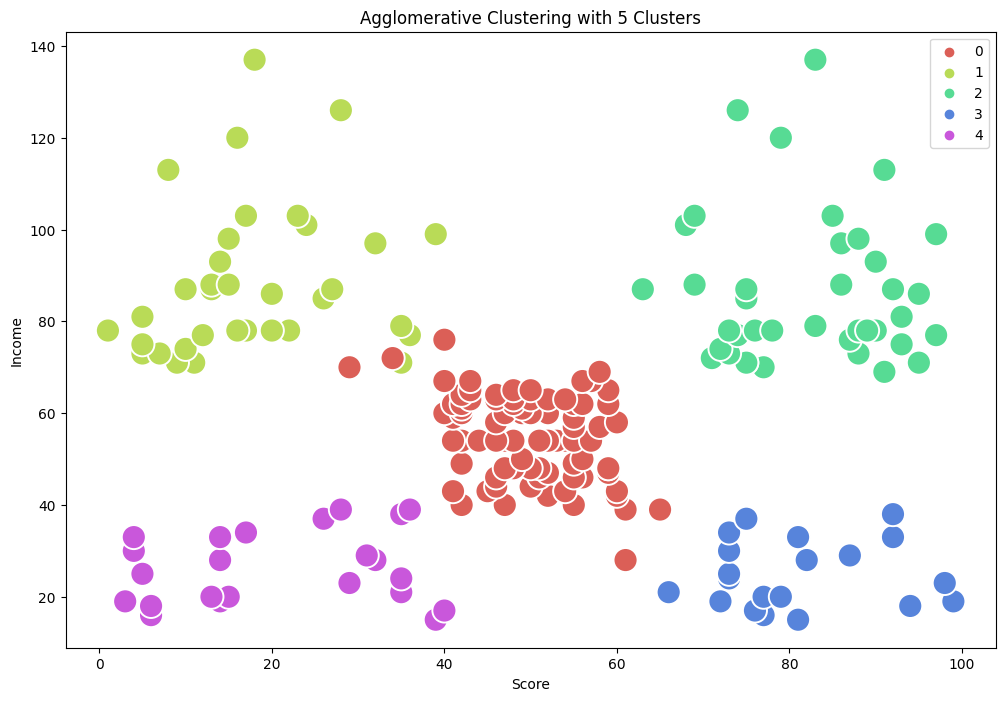

In [25]:
from sklearn.cluster import AgglomerativeClustering

clust_model = AgglomerativeClustering(
                                        n_clusters=5, 
                                        affinity='euclidean', 
                                        linkage='ward'
                                    )

clust_model = clust_model.fit(X[["Income", "Score", "Age"]])

plt.figure(figsize=(12, 8))

sns.scatterplot(
                    data=X, 
                    x="Score", 
                    y="Income", 
                    hue=clust_model.labels_, 
                    palette=sns.color_palette('hls', 5), 
                    s = 300
                )

plt.xlabel("Score")
plt.ylabel("Income")

plt.title(f'Agglomerative Clustering with 5 Clusters')
plt.show()

C:\Users\TICS lab\AppData\Local\Temp\ipykernel_6924\2442260297.py:9: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



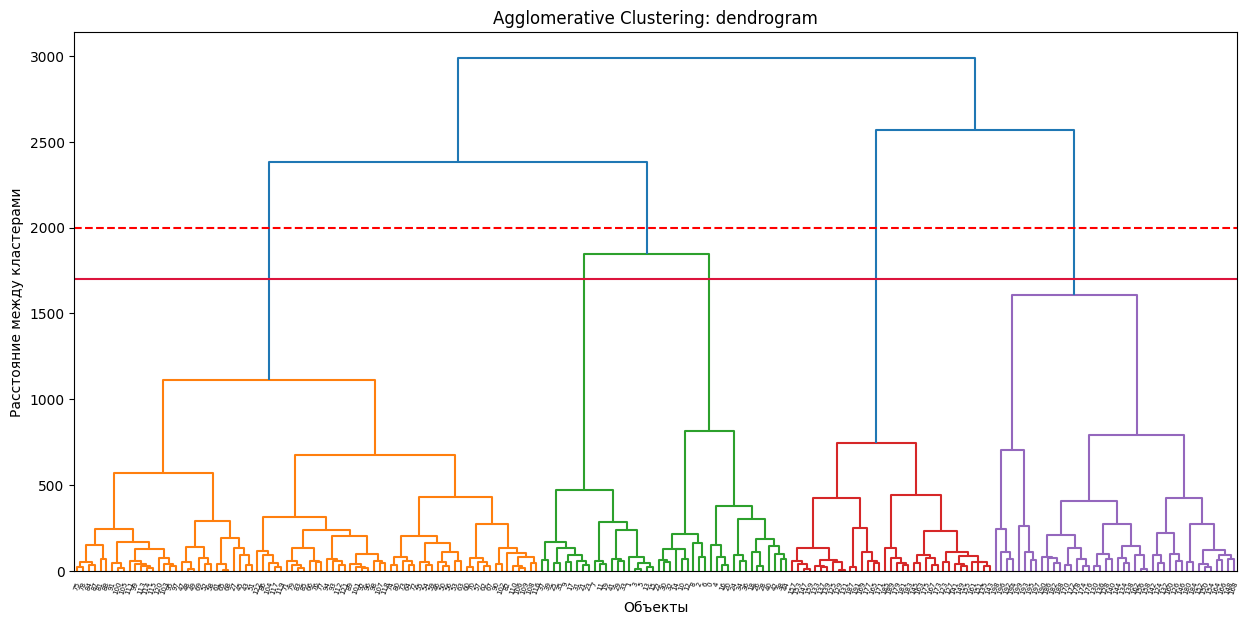

In [26]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(
                        X[["Income", "Score", "Age"]], 
                        X[["Income", "Score", "Age"]]
                    )

Z = hierarchy.linkage(dist, 'ward')

plt.figure(figsize=(15, 7))
dendro = hierarchy.dendrogram(
                                Z, 
                                leaf_rotation=70, 
                                leaf_font_size=5, 
                                orientation='top',
                                # # последние р кластеров
                                # truncate_mode='lastp',  
                                # p=5,
                                show_contracted=True,
                            )

plt.xlabel("Объекты")
plt.ylabel("Расстояние между кластерами")
plt.axhline(2000, color='red', linestyle='--'); 
plt.axhline(1700, color='crimson'); 

plt.title(f'Agglomerative Clustering: dendrogram')
plt.show()

<h3>Метод DBSCAN</h3>

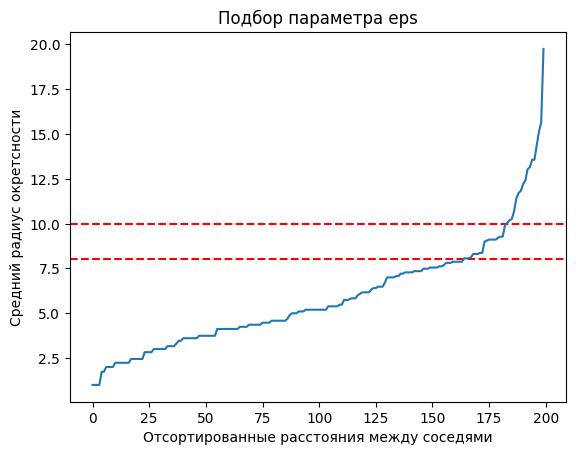

In [27]:
# Подбор гиперпараметра окрестности (eps)
# # Ищем максимальный излом

from sklearn.neighbors import NearestNeighbors

NNeigh = NearestNeighbors(n_neighbors=5)
nbrs = NNeigh.fit(X[['Income', 'Score', 'Age']])

distances, indices = nbrs.kneighbors(X[['Income', 'Score', 'Age']])
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.axhline(8, color='red', linestyle='--'); 
plt.axhline(10, color='red', linestyle='--'); 

plt.xlabel("Отсортированные расстояния между соседями")
plt.ylabel("Средний радиус окретсности")

plt.title('Подбор параметра eps')

plt.plot(distances)

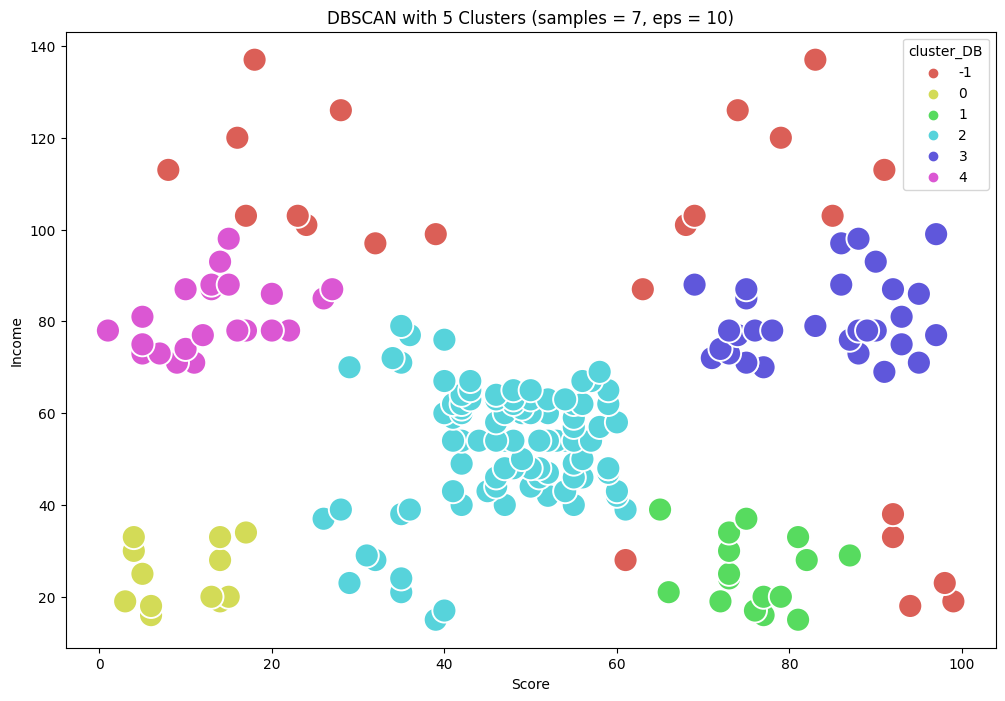

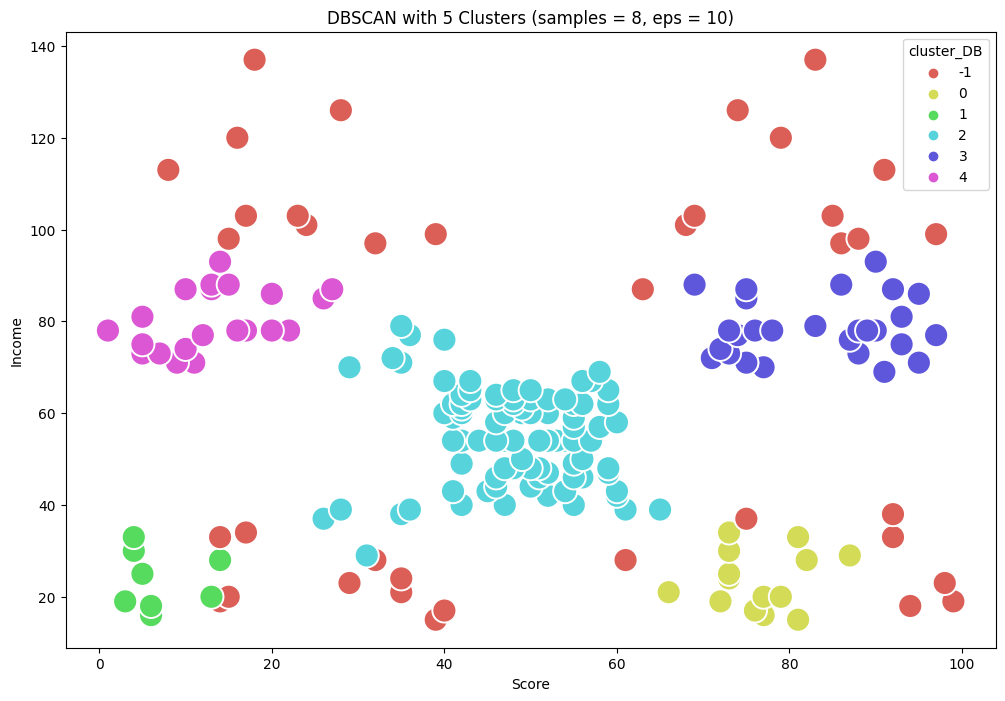

In [28]:
# Непосредственно DBSCAN

from sklearn.cluster import DBSCAN

for i in range(3, 10):
        dbscan_clust = DBSCAN(eps=10, min_samples=i)
        dbscan_clust = dbscan_clust.fit(X[['Income', 'Score']])
 
        X['cluster_DB'] = dbscan_clust.labels_

        n_clust = len(X['cluster_DB'].unique())

        # т.к. интересует 5 кластеров для сравнения
        if((n_clust>6)|(n_clust<6)):
            continue

        plt.figure(figsize=(12, 8))
        sns.scatterplot(
                        data=X, 
                        x="Score", 
                        y="Income", 
                        hue=X["cluster_DB"], 
                        palette=sns.color_palette('hls', n_clust), 
                        s = 300
                    )
        plt.title(f'DBSCAN with {n_clust-1} Clusters (samples = {i}, eps = 10)')
        plt.show()

In [29]:
X

,Age,Income,Score,Labels,cluster,true,cluster_DB
0,19,15,39,3,0,3,-1
1,21,15,81,2,4,1,0
2,20,16,6,4,0,1,-1
3,23,16,77,2,4,1,0
4,31,17,40,3,0,2,-1
...,...,...,...,...,...,...,...
195,35,120,79,2,1,4,-1
196,45,126,28,1,2,4,-1
197,32,126,74,2,1,2,-1
198,32,137,18,4,2,1,-1


In [30]:
# Подбор гиперпараметра окрестности (eps) при помощи бибилотеки OPTICS
from sklearn.cluster import OPTICS

dbscan_optics = OPTICS(min_samples=9).fit(X[['Income', 'Score', 'Age']])

dbscan_optics.labels_

array([-1,  2, -1,  2, -1,  2, -1, -1, -1,  2, -1, -1, -1,  2, -1,  2, -1,
        2, -1, -1, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,
       -1,  2, -1,  2, -1,  2, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  0, -1,
        1, -1, -1, -1, -1, -1, -1,  1,  0,  0,  1, -1, -1, -1, -1,  0,  1,
        0, -1,  1,  1,  0, -1,  1,  0,  0, -1,  1,  0,  1,  0,  1,  1,  0,
       -1,  1,  0,  1, -1,  0, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  0,
       -1,  1, -1, -1, -1, -1,  3, -1, -1,  4,  3,  4,  3, -1,  3, -1, -1,
        4,  3, -1,  3,  4, -1,  2, -1,  4, -1, -1,  3,  4, -1,  4, -1,  4,
        3,  4, -1,  4,  3,  4,  3, -1, -1, -1, -1,  4,  3,  4, -1,  4, -1,
        4, -1,  4, -1,  4, -1,  4, -1,  4, -1, -1, -1,  4, -1, -1, -1,  4,
       -1,  4, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1])

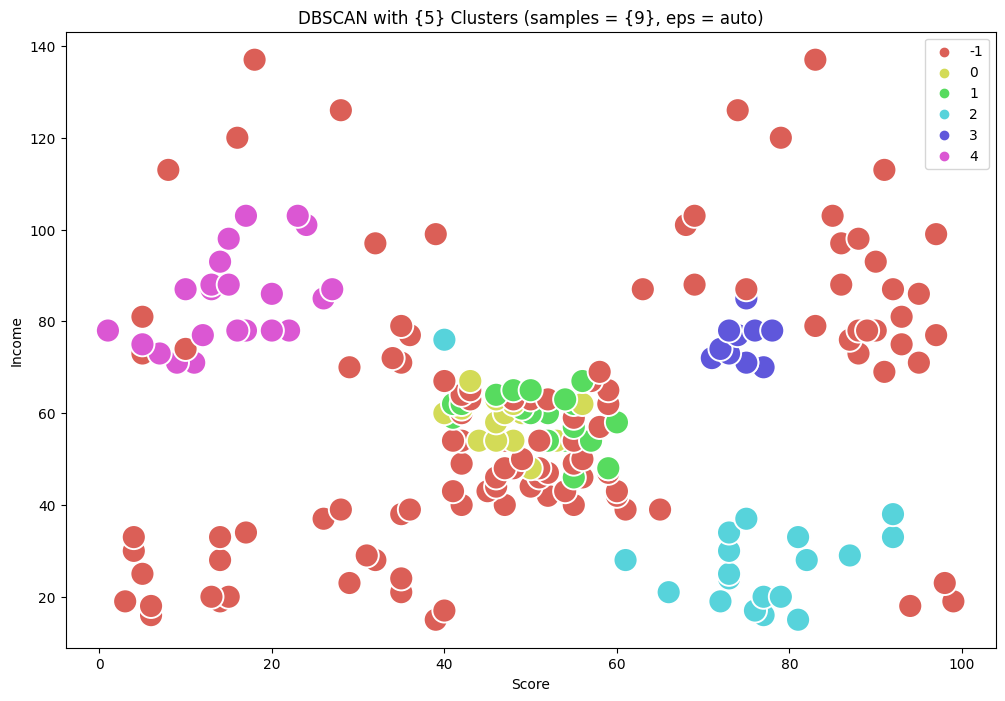

In [31]:
# Подбор гиперпараметра окрестности (eps) при помощи бибилотеки OPTICS
from sklearn.cluster import OPTICS

dbscan_optics = OPTICS(min_samples=9).fit(X[['Income', 'Score', 'Age']])

plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x="Score", y="Income", hue=dbscan_optics.labels_, palette=sns.color_palette('hls', 6), s = 300)

#sns.scatterplot(
#                    data=X, 
#                    x="Score", 
#                    y="Income", 
#                    hue=clust_model.labels_, 
#                    palette=sns.color_palette('hls', 5), 
#                    s = 300
#                )

plt.title('DBSCAN with {5} Clusters (samples = {9}, eps = auto)')
plt.show()